In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [4]:
df = pd.read_parquet("results/synthetic_evolution.parquet")
print(df.shape)

df_metadata = pd.read_parquet("results/synthetic_metadata.parquet")
print(df_metadata.shape)

(1452736, 11)
(3125, 30)


In [5]:
df.head()

,Fitness,Depth,Nodes,Generations,time_since_the_start_of_the_evolution,seed,genotype_as_str,Seed,Requested Depth,Fitness Difficulty,Method
0,0.0,1,1,1,0.268589,919,"Genotype(dna=[37097, 55385, 73225, 91286, 9617...",919,8,medium,ge
1,0.0,1,1,1,0.933101,919,"Genotype(dna={""<class 'abc.NT_0018'>"": [1, 502...",919,8,medium,dsge
2,0.0,1,1,1,0.365667,919,NT_0018_P_00001(__a=NT_0004_P_00001()),919,8,medium,treebased
3,0.0,1,1,1,0.294910,589,"Genotype(dna=[7296, 49127, 48511, 6213, 24618,...",589,8,medium,ge
4,0.0,1,1,1,0.373992,589,"Genotype(dna={""<class 'abc.NT_0005'>"": [2, 217...",589,8,medium,dsge


In [6]:
df_metadata.head()

,seed,configuration_name,grammar,fitness difficulty,representation,maximum depth,fitness,Execution Time,Peak memory usage,Number of Generations,...,G Production occurrences,G Recursive Productions,G Non-terminal Count,G Recursive Non-terminal Count,G Average Productions per Non-terminal,Non-terminals per Production,Original Seed,Requested Depth,Fitness Difficulty,Method
0,356,synthetic_356_12_hard,"Grammar<Starting=NT_0003,Productions=[NT_0003 ...",hard,ge,12,271,35.992505,0,100,...,"{1: 1, 3: 2}",4,4,3,4,6,356,12,hard,ge
1,20499,synthetic_20499_10_easy,"Grammar<Starting=NT_0010,Productions=[NT_0010 ...",easy,ge,10,0,2.576614,0,1,...,"{2: 7, 3: 3, 4: 1}",8,11,1,4,6,20499,10,easy,ge
2,20499,synthetic_20499_10_easy,"Grammar<Starting=NT_0010,Productions=[NT_0010 ...",easy,dsge,10,0,5.714727,0,1,...,"{2: 7, 3: 3, 4: 1}",8,11,1,4,6,20499,10,easy,dsge
3,20499,synthetic_20499_10_easy,"Grammar<Starting=NT_0010,Productions=[NT_0010 ...",easy,treebased,10,0,4.115233,0,1,...,"{2: 7, 3: 3, 4: 1}",8,11,1,4,6,20499,10,easy,treebased
4,10400,synthetic_10400_12_easy,"Grammar<Starting=NT_0017,Productions=[NT_0017 ...",easy,ge,12,0,1.468273,0,1,...,"{1: 2, 2: 1, 3: 3, 4: 2, 5: 4}",11,18,14,6,6,10400,12,easy,ge


/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

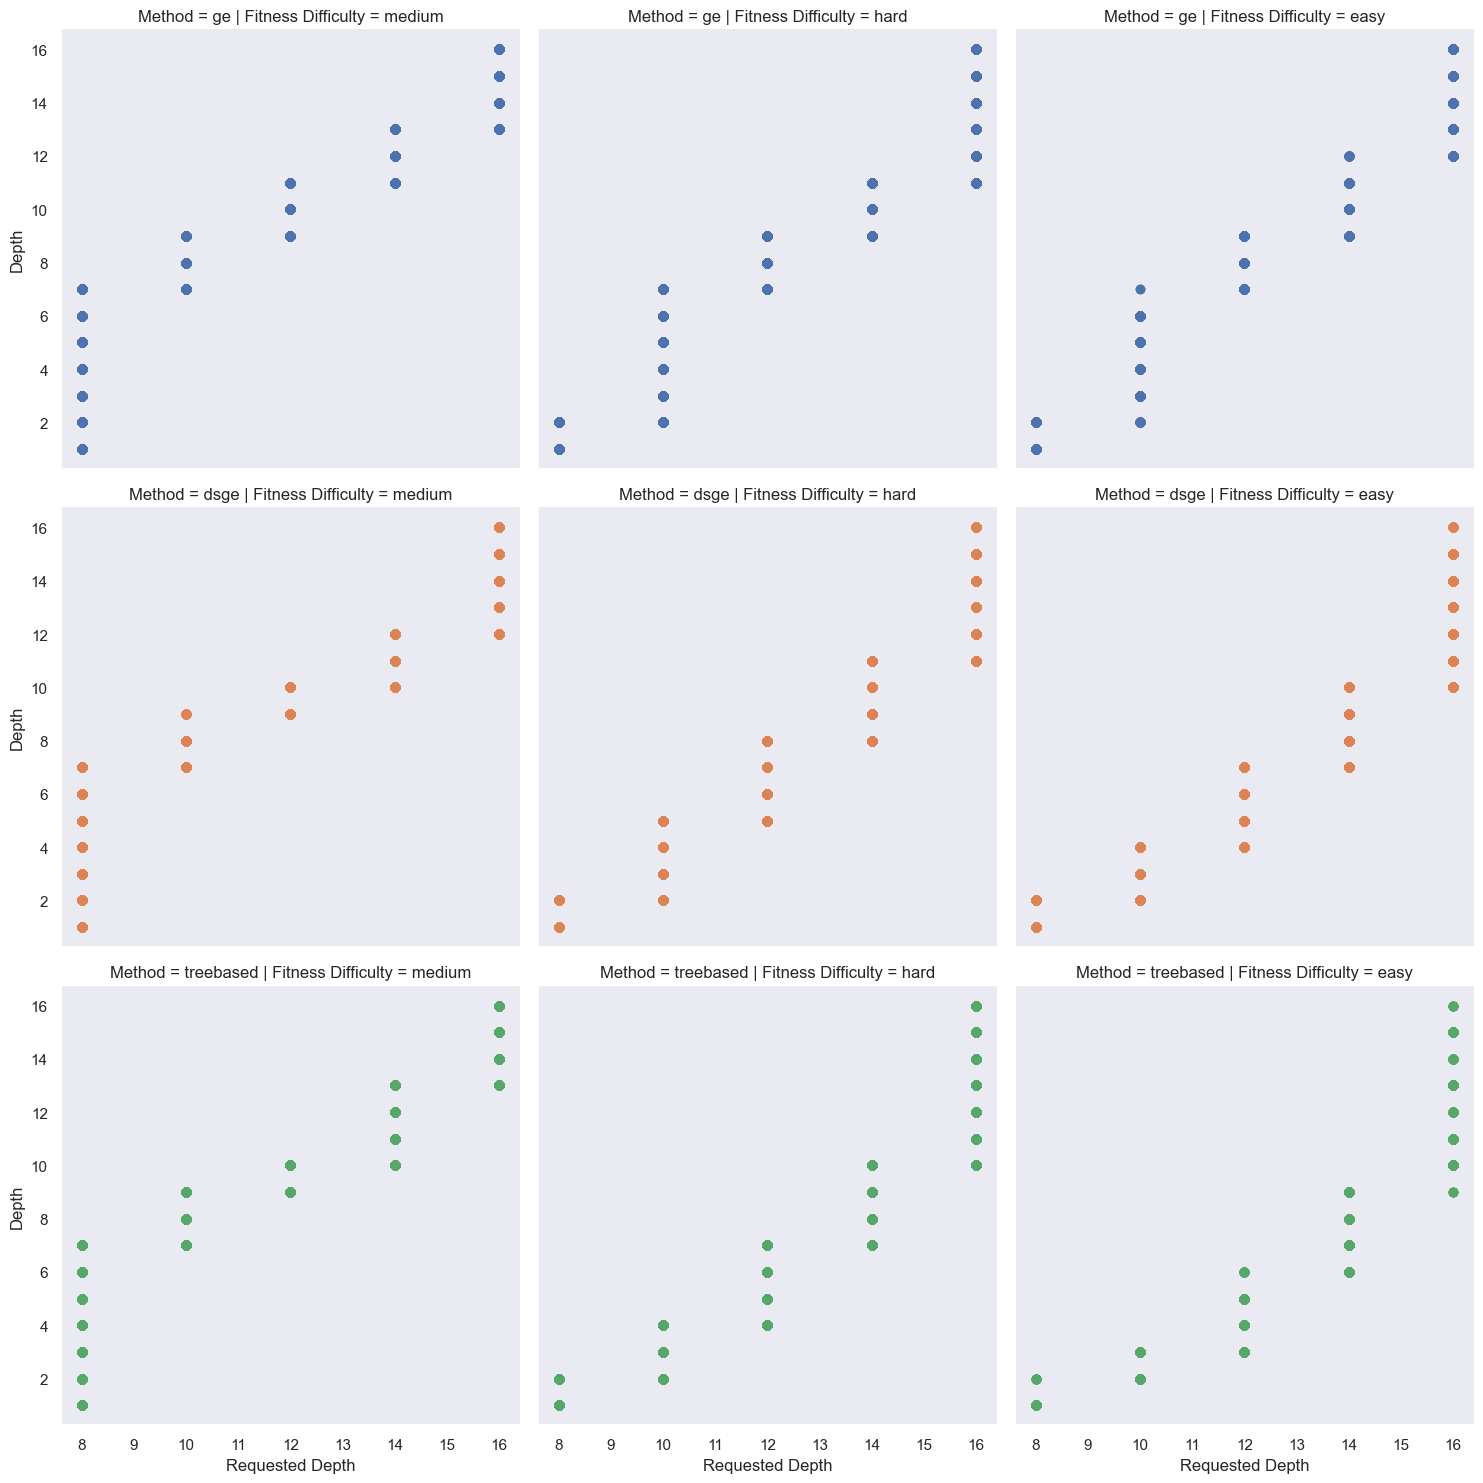

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#radius = 0.7
#df["Depth'"] = df["Depth"] + np.random.uniform(-radius, radius, df["Depth"].shape)
#df["Requested Depth'"] = df["Requested Depth"] + np.random.uniform(-radius, radius, df["Requested Depth"].shape)
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue="Method", row="Method", col="Fitness Difficulty", height=5)
g.map(qqplot, "Requested Depth", "Depth") # , extent=[0, 50, 0, 10]

In [ ]:
best_df = df.loc[df.groupby(["Method", "Requested Depth", "Fitness Difficulty", "Seed"])["Generations"].idxmax()]

In [ ]:
best_df.tail()

,Fitness,Depth,Nodes,Generations,time_since_the_start_of_the_evolution,seed,genotype_as_str,Seed,Requested Depth,Fitness Difficulty,Method
1133872,0.0,1,1,1,0.143853,140230,NT_0013_P_00000(__a=True),140230,16,medium,treebased
345974,0.0,1,1,1,0.066087,140443,"NT_0002_P_00001(__a=True, __b=3)",140443,16,medium,treebased
39243,0.0,15,21,87,18.937661,140481,NT_0009_P_00001(__a=NT_0008_P_00001(__a=NT_000...,140481,16,medium,treebased
257186,16.0,16,77,100,26.481870,140813,"NT_0003_P_00005(__a=NT_0002_P_00000(), __b=NT_...",140813,16,medium,treebased
941320,0.0,3,3,1,0.044241,150892,NT_0017_P_00000(__a=NT_0006_P_00000(__a=NT_000...,150892,16,medium,treebased


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#radius = 0.7
#df["Depth'"] = df["Depth"] + np.random.uniform(-radius, radius, df["Depth"].shape)
#df["Requested Depth'"] = df["Requested Depth"] + np.random.uniform(-radius, radius, df["Requested Depth"].shape)
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    plt.yscale('symlog')
    

with sns.axes_style("dark"):
    g = sns.FacetGrid(best_df, hue="Method", col="Fitness Difficulty", height=5, col_order=["easy", "medium", "hard"],sharey=False)
g.map(qqplot, "Requested Depth", "Fitness") # , extent=[0, 50, 0, 10]
plt.show()


/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/alcides/Code/Research/IndividualRepresentationComparison/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

In [ ]:
df["Requested Depth"].unique()


array([ 8, 14, 12, 10, 16])